**Foundation**

# Intuition for Imbalanced Classification

**Create and Plot a Binary Classification Problem**

In [ ]:
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2 ,n_features=2, cluster_std=3, random_state=1)

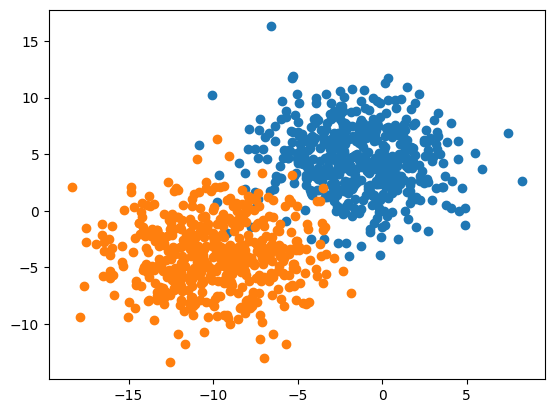

In [ ]:
for class_value in range(2):
    row_ix = where(y == class_value)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

**Create Synthetic Dataset with a Class Distribution**

In [ ]:
from numpy import unique, hstack, vstack, where
from matplotlib import pyplot
from sklearn.datasets import make_blobs

In [ ]:
def get_dataset(proportions):
    n_classes = len(proportions)
    largest = max([v for k,v in proportions.items()])
    n_samples = largest * n_classes
    X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, 
                      cluster_std=3, random_state=1)
    
    X_list, y_list = [], []
    for k, v in proportions.items():
        row_ix = where(y == k)[0]
        selected = row_ix[:v]
        X_list.append(X[selected, :])
        y_list.append(y[selected])
        
    return vstack(X_list), hstack(y_list)

In [ ]:
def plot_dataset(X, y):
    n_classes = len(unique(y))
    for class_value in range(n_classes):
        row_ix = where(y == class_value)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
        
    pyplot.legend()
    pyplot.show()

In [ ]:
proportions = {0:5000, 1:5000}

In [ ]:
X, y = get_dataset(proportions)

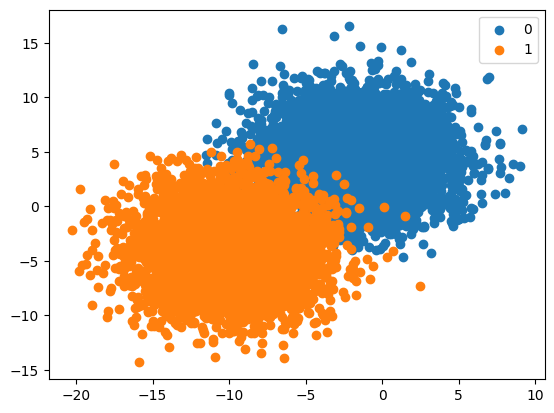

In [ ]:
plot_dataset(X, y)

**Effect of Skewed Class Distributions**

1:10 Imbalanced Class Distribution

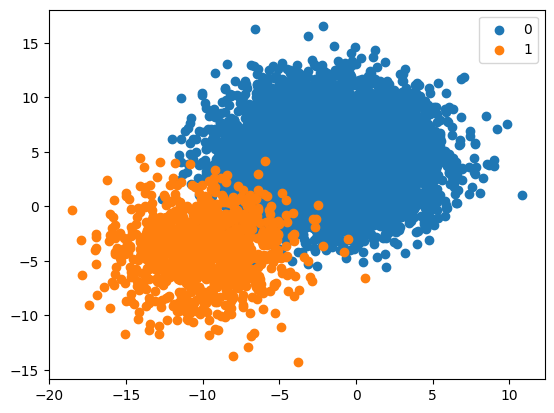

In [ ]:
proportions = {0:10000, 1:1000}
X, y = get_dataset(proportions)
plot_dataset(X, y)

1:100 Imbalanced Class Distribution

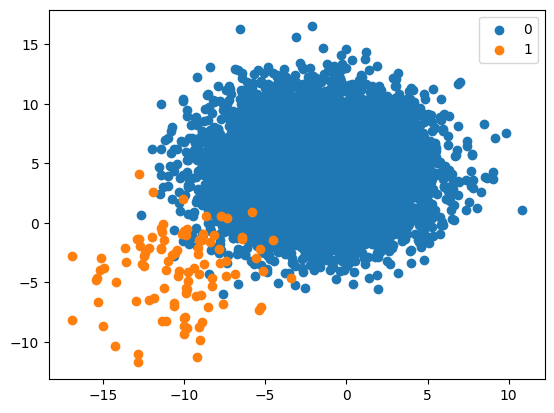

In [ ]:
proportions = {0:10000, 1:100}
X, y = get_dataset(proportions)
plot_dataset(X, y)

1:1000 Imbalanced Class Distribution

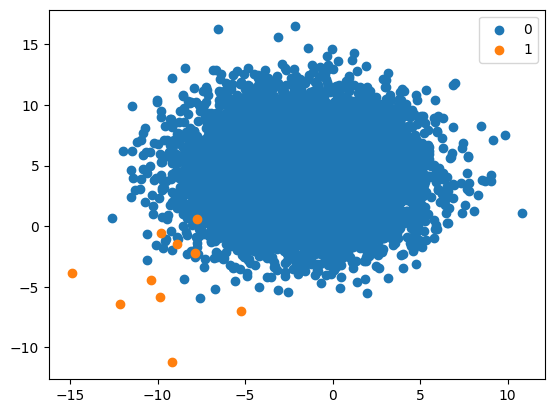

In [ ]:
proportions = {0:10000, 1:10}
X, y = get_dataset(proportions)
plot_dataset(X, y)

# Challenge of Imbalanced Classification

In [ ]:
from matplotlib import pyplot
from numpy import where 
from collections import Counter
from sklearn.datasets import make_classification

**Compounding Effect of Dataset Size**

In [ ]:
sizes = [100, 1000, 10000, 100000]

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


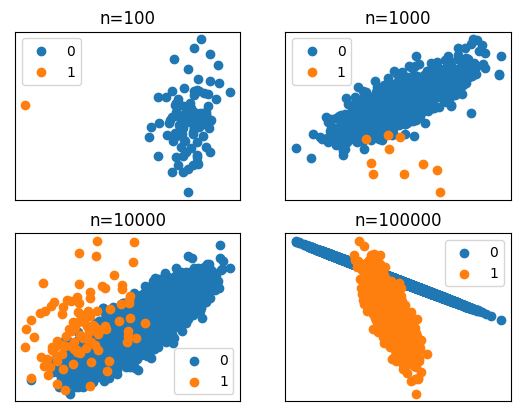

In [ ]:
for i in range(len(sizes)):
    n = sizes[i]
    X, y = make_classification(n_samples=n, n_features=2, n_redundant=0, n_clusters_per_class=1, 
                               weights=[0.99], flip_y=0, random_state=1)
    counter = Counter(y)
    print(f'Size={n}, Ratio={counter}')
    
    pyplot.subplot(2, 2, 1+i)
    pyplot.title('n=%d' % n)
    pyplot.xticks([])
    pyplot.yticks([])
    
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
    pyplot.legend()

pyplot.show()

**Compounding Effect of Label Noise**

In [ ]:
noise = [0, 0.01, 0.05, 0.07]

Noise= 0, Ratio= Counter({0: 990, 1: 10})
Noise= 1, Ratio= Counter({0: 983, 1: 17})
Noise= 5, Ratio= Counter({0: 963, 1: 37})
Noise= 7, Ratio= Counter({0: 959, 1: 41})


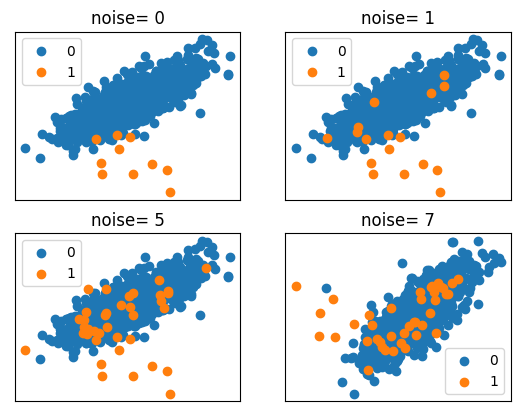

In [ ]:
for i in range(len(noise)):
    n = noise[i]
    X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                              n_clusters_per_class=1, weights=[0.99], flip_y=n, random_state=1)
    counter = Counter(y)
    print(f'Noise= {int(n*100)}, Ratio= {counter}')
    
    pyplot.subplot(2, 2, 1+i)
    pyplot.title(f'noise= {int(n*100)}')
    pyplot.xticks([])
    pyplot.yticks([])
    
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    
pyplot.show()

**Compounding Effect of Data Distribution**

In [ ]:
clusters = [1, 2]

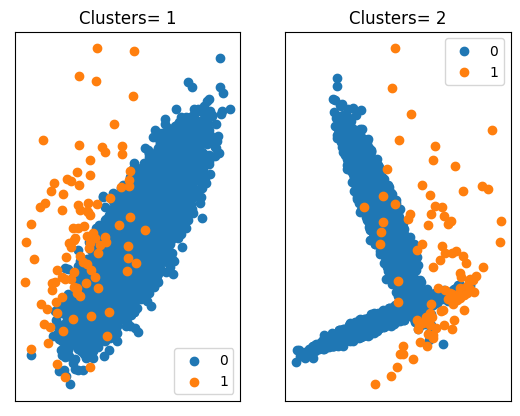

In [ ]:
for i in range(len(clusters)):
    c = clusters[i]
    X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                              n_clusters_per_class=c, weights=[0.99], flip_y=0, random_state=1)
    counter = Counter(y)
    
    pyplot.subplot(1, 2, 1+i)
    pyplot.title(f'Clusters= {c}')
    pyplot.xticks([])
    pyplot.yticks([])
    
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
    pyplot.legend()
    
pyplot.show()